**Лабараторная работа №3**


Храмцовой Дарьи Алексеевны 

Группа: 18-ИВТ-3


 **Вариант 19. Nasa**
 
1.Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

3.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

4.Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

5.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

6.Заполните пропущенные значения в данных;

7.Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 


**Кодировка классификаторов:**

**1 – линейная регрессия без использования регуляризаторов;**

**2 – линейная регрессия, LASSO регуляризатор;**

3 – линейная регрессия, RIDGE регуляризатор;
 

 


**1.Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных .**

In [2]:
import pandas as pd
%matplotlib inline


In [3]:
nasa = pd.read_csv('airfoil_self_noise.dat.txt')
nasa.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0,0.3048,71.3,0.002663,126.201
1,1000,0,0.3048,71.3,0.002663,125.201
2,1250,0,0.3048,71.3,0.002663,125.951
3,1600,0,0.3048,71.3,0.002663,127.591
4,2000,0,0.3048,71.3,0.002663,127.461


In [3]:
nasa.shape

(1503, 6)

In [4]:
nasa.nunique()

Frequency                                21
Angle of attack                          27
Chord length                              6
Free-stream velocity                      4
Suction side displacement thickness     105
Scaled sound pressure level            1456
dtype: int64

1.Frequency - Частота, в герцах

2.Angle of attack - Угол атаки, в градусах 

3.Chord length - Длина хорды, в метрах

4.Free-stream velocity - Скорость свободного потока, в метрах в секунду

5.Suction side displacement thickness - Толщина смещения стороны всасывания, в метрах

6.Scaled sound pressure level - Масштабированный уровень звукового давления, в децибелах

 

**2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;**

In [5]:
print("Размер набора данных до удаления дубликатов: ", nasa.shape)
print("Размер набора данных после удаления дубликатов:", nasa.drop_duplicates().dropna().shape) 

Размер набора данных до удаления дубликатов:  (1503, 6)
Размер набора данных после удаления дубликатов: (1503, 6)


**3.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)**

In [16]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
signs = [i for i in nasa.columns if nasa[i].dtype.name != 'object']
print('Количественные признаки: ', signs)


Количественные признаки:  ['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side displacement thickness', 'Scaled sound pressure level']


До масштабирования

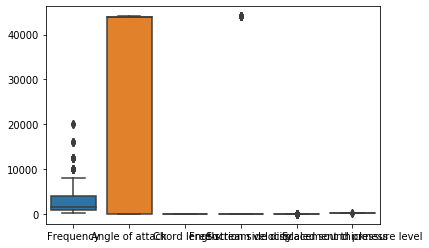

In [7]:
signs = ['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side displacement thickness', 'Scaled sound pressure level']
sns.boxplot(data=nasa[signs])
plt.show()

После масштабирования

In [18]:
nasa[signs] = MinMaxScaler().fit_transform(nasa[signs])
nasa.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,0.030303,0.0,1.0,0.00072,0.039005,0.606829
1,0.040404,0.0,1.0,0.00072,0.039005,0.580238
2,0.053030,0.0,1.0,0.00072,0.039005,0.600181
3,0.070707,0.0,1.0,0.00072,0.039005,0.643790
4,0.090909,0.0,1.0,0.00072,0.039005,0.640333


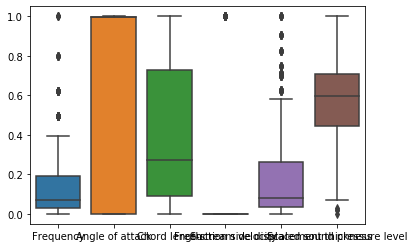

In [19]:
signs = ['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side displacement thickness', 'Scaled sound pressure level']
sns.boxplot(data=nasa[signs])
plt.show()

**4.Выполните замену категориальных признаков**


В данном варианте категориальных признаков нет

**5.Оцените корреляцию**

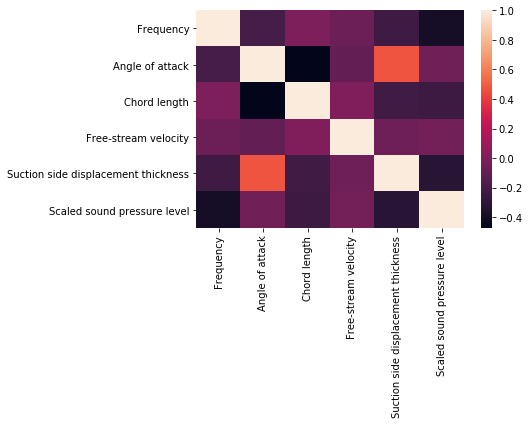

In [10]:
import seaborn as sns
corr = nasa.corr()
sns.heatmap(corr)

**6.Заполните пропущенные значения в данных**

In [11]:
nasa.count()

Frequency                              1503
Angle of attack                        1503
Chord length                           1503
Free-stream velocity                   1503
Suction side displacement thickness    1503
Scaled sound pressure level            1503
dtype: int64

Пропущенных значений в данных нет

**7.Решите поставленную задачу регрессии в соответствии с заданием**

In [7]:
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

**линейная регрессия без использования регуляризаторов**

In [8]:
data_x, data_y = nasa.drop(['Scaled sound pressure level'], axis=1),nasa['Scaled sound pressure level']
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.3, random_state = 123)

reg = LinearRegression()
reg.fit(train_x, train_y)
pred_reg = reg.predict(test_x)
print(pred_reg[:15] - test_y[:15])

61      1.963940
1025   -7.878605
1333   -3.084607
817     4.469357
725     2.700551
569     0.797016
1019    6.219870
1023   -7.694367
256     3.551818
1079   -1.472368
1401   -0.660119
28      1.038045
712    -0.707226
981    -8.849998
196     1.718236
Name: Scaled sound pressure level, dtype: float64


In [10]:
P, p_value_P = pearsonr(pred_reg, test_y)
S, p_value_S = spearmanr(pred_reg, test_y)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")
if p_value_P < 0.05 and p_value_S < 0.05:
    print('p-value is good')
else:
    print('p-value is not good')


Pearson correlation: 0.6823526325734806 p_value: 4.421326066927666e-63
Spearman correlation: 0.6253071020049413 p_value: 2.649356578955047e-50
p-value is good


**линейная регрессия, LASSO регуляризатор**

In [12]:
lasso = Lasso()
params = {'alpha': np.arange(0.01, 1, 0.005)}
grid_search = GridSearchCV(lasso, params)
grid_search.fit(train_x, train_y)
best = grid_search.best_estimator_.alpha
print('Best alpha:', best)

lasso = Lasso(alpha=best)
lasso.fit(train_x,train_y)
predict_regulate = lasso.predict(test_x)
pearson, pearson_p_value = pearsonr(predict_regulate, test_y)
spearman, spearman_p_value = spearmanr(predict_regulate, test_y)


Best alpha: 0.01


In [14]:
P, p_value_P = pearsonr(pred_reg, test_y)
S, p_value_S = spearmanr(pred_reg, test_y)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearmen correlation: {S} p_value: {p_value_S}")
if p_value_P < 0.05 and p_value_S < 0.05:
    print('p-value is good')
else:
    print('p-value is not good')


Pearson correlation: 0.524817570672555 p_value: 2.75828350921463e-33
Spearmen correlation: 0.46445210490703553 p_value: 1.638698291784637e-25
p-value is good
